# Setup

In [ ]:
import torch

from utils.generate_input_from_data_directory import generate_input_from_data_directory
from utils.generate_input_from_tensors import generate_input_from_tensors
from utils.predict_layout import predict_layout
from utils.combine_elements_based_on_layout_dm import combine_elements_based_on_layout_dm
from utils.save_pred_to_json import save_pred_to_json
#from utils.print_attrs import print_attrs

# Compare input generation methods

## 1. generate from tensors (user passed of default)


In [ ]:
custom_input_from_tensor_default = generate_input_from_tensors(verbatim=True)

In [ ]:
custom_input_from_tensor = generate_input_from_tensors(
    bboxes_tensor = torch.FloatTensor([
        [0.5, 0.5, 0.1, 0.6],
        [0.5, 0.5, 0.6, 0.1],
        [0.5, 0.5, 0.2, 0.2],
        [0.5, 0.5, 0.4, 0.4],
        [0.8, 0.8, 0.1, 0.1],
        [0.2, 0.2, 0.1, 0.1]
    ]),
    labels_tensor = torch.LongTensor([0, 1, 6, 4, 0, 0]),
    verbatim=True
)

## 2. generate based on files from data directory

In [ ]:
custom_input_from_data_directory, list_files = generate_input_from_data_directory(verbatim=True)

# Comaparison of models 

## 1. Trained on Rico dataset (default)
`model_name = layoutdm_publaynet`

### 1.1. Condition type 'c'
C -> S+P (reposition and resize)

In [ ]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_rico', cond_type='c', plot_images=True, print_output=False)

### 1.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)

In [ ]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_rico', cond_type='cwh', plot_images=True, print_output=False)

## 2. Trained on PubLayNet dataset
`model_name = layoutdm_publaynet`

### 2.1. Condition type 'c'
C -> S+P (reposition and resize)

In [ ]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_publaynet', cond_type='c', plot_images=True, print_output=False)

### 2.2. Condition type 'cwh'
C+S -> P (reposition and dont' resize)

In [ ]:
pred = predict_layout(custom_input_from_tensor_default, model_name='layoutdm_publaynet', cond_type='cwh', plot_images=True, print_output=False)

# Recommened approach

Recommendations:
- model:            Rico
- condition typ:    cwh ("C+S -> P": reposition without resizing)
    
Optional:
- W_CANVAS
- n_samples (default: 4)

## input
generate input tensors from objects in /data/

In [ ]:
custom_input, list_files = generate_input_from_data_directory(verbatim=True)

## output
predict layouts using layoutdm for objects in /data/

In [ ]:
pred = predict_layout(custom_input,
                      model_name='layoutdm_rico',
                      cond_type='cwh',
                      plot_images=True,
                      print_output=False,
                      n_samples=10)

## save
the predicted layouts from layoutdm in a json format (predicted_layouts.json)

In [ ]:
predicted_layouts = save_pred_to_json(list_files, pred, verbatim=False)

## combine 
combine the input elements into the output png file, based on the layoutdm predicted layouts (predicted_layouts.json)

In [ ]:
combine_elements_based_on_layout_dm(predicted_layouts)

# tests

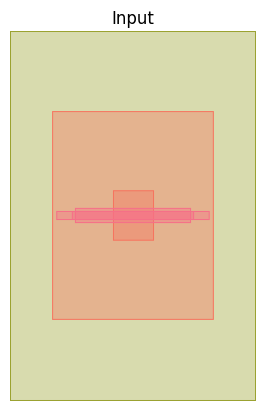

In [3]:
from utils.generate_input_from_data_directory import generate_input_from_data_directory
from utils.predict_layout import predict_layout
from utils.combine_elements_based_on_layout_dm import combine_elements_based_on_layout_dm
from utils.save_pred_to_json import save_pred_to_json

custom_input, list_files = generate_input_from_data_directory()
pred = predict_layout(custom_input,
                      model_name='layoutdm_rico',
                      cond_type='cwh',
                      plot_images=True,
                      print_output=False,
                      n_samples=4)
predicted_layouts = save_pred_to_json(list_files, pred, verbatim=False)
combine_elements_based_on_layout_dm(predicted_layouts, verbatim=True)